### In this notebook , we look for the number and decay length of dark photons which has a lepton jet nearby. Nearby here means, the delta R between the dark photon and the lepton jet is less than .4.

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)

<module 'sidm.tools.utilities' from '/home/cms-jovyan/SIDM/sidm/studies/../../sidm/tools/utilities.py'>

In [2]:
samples = [
    "2Mu2E_100GeV_5GeV_40mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    #"2Mu2E_200GeV_5GeV_2mm",
    #"2Mu2E_500GeV_5GeV_0p8mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    "2Mu2E_1000GeV_5GeV_40mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "no_lj_selection",
        "2mu2e",
        
        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

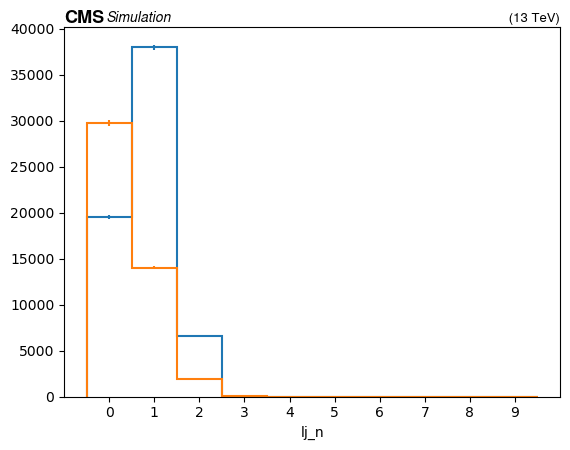

In [4]:
ch1 ="no_lj_selection"
ch2="2mu2e"
utilities.plot([output["out"][f"{name}"]["hists"]["lj_n"][ch1,:] for name in samples], density=False)

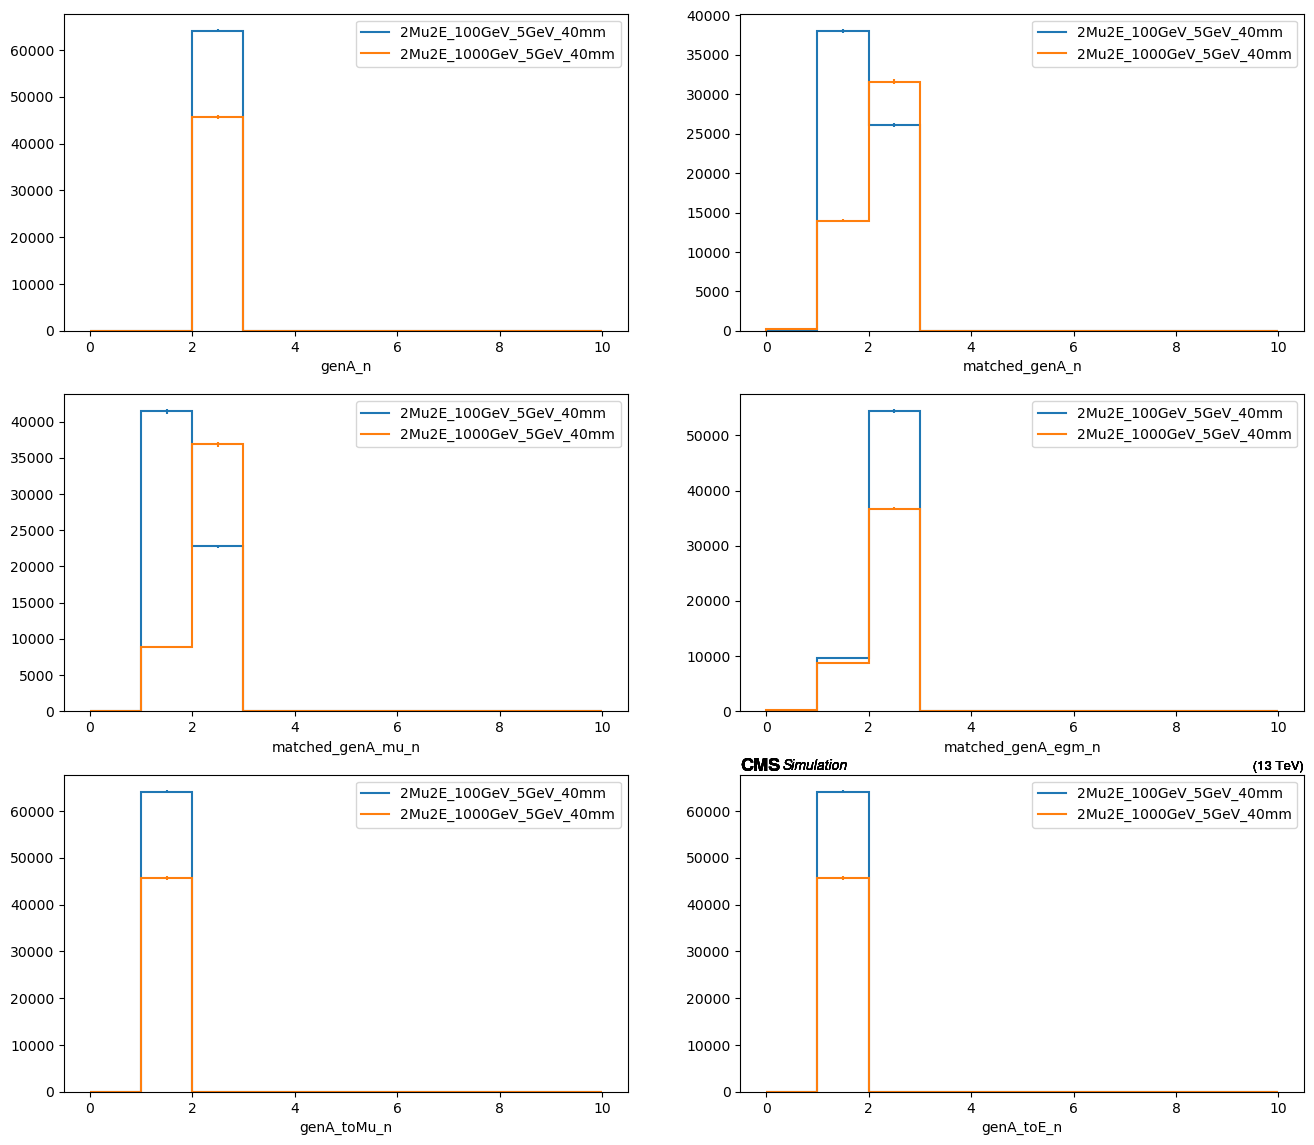

In [5]:
fig, ((ax1,ax2), (ax4,ax5), (ax7, ax8)) = plt.subplots(3,2, figsize=(16,14))

utilities.plot([output["out"][f"{name}"]["hists"]["genA_n"][ch1,:] for name in samples], ax=ax1, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_n"][ch1,:] for name in samples], ax=ax2, density=False)
#utilities.plot([output["out"][f"{name}"]["hists"]["matched_lj_n"][ch1,:] for name in samples], ax=ax3, density=False)


utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_mu_n"][ch1,:] for name in samples], ax=ax4, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_egm_n"][ch1,:] for name in samples], ax=ax5, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_n"][ch1,:] for name in samples], ax=ax7, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_n"][ch1,:] for name in samples], ax=ax8, density=False)



ax1.legend(samples)
ax2.legend(samples)
ax7.legend(samples)
ax4.legend(samples)
ax5.legend(samples)
ax8.legend(samples)

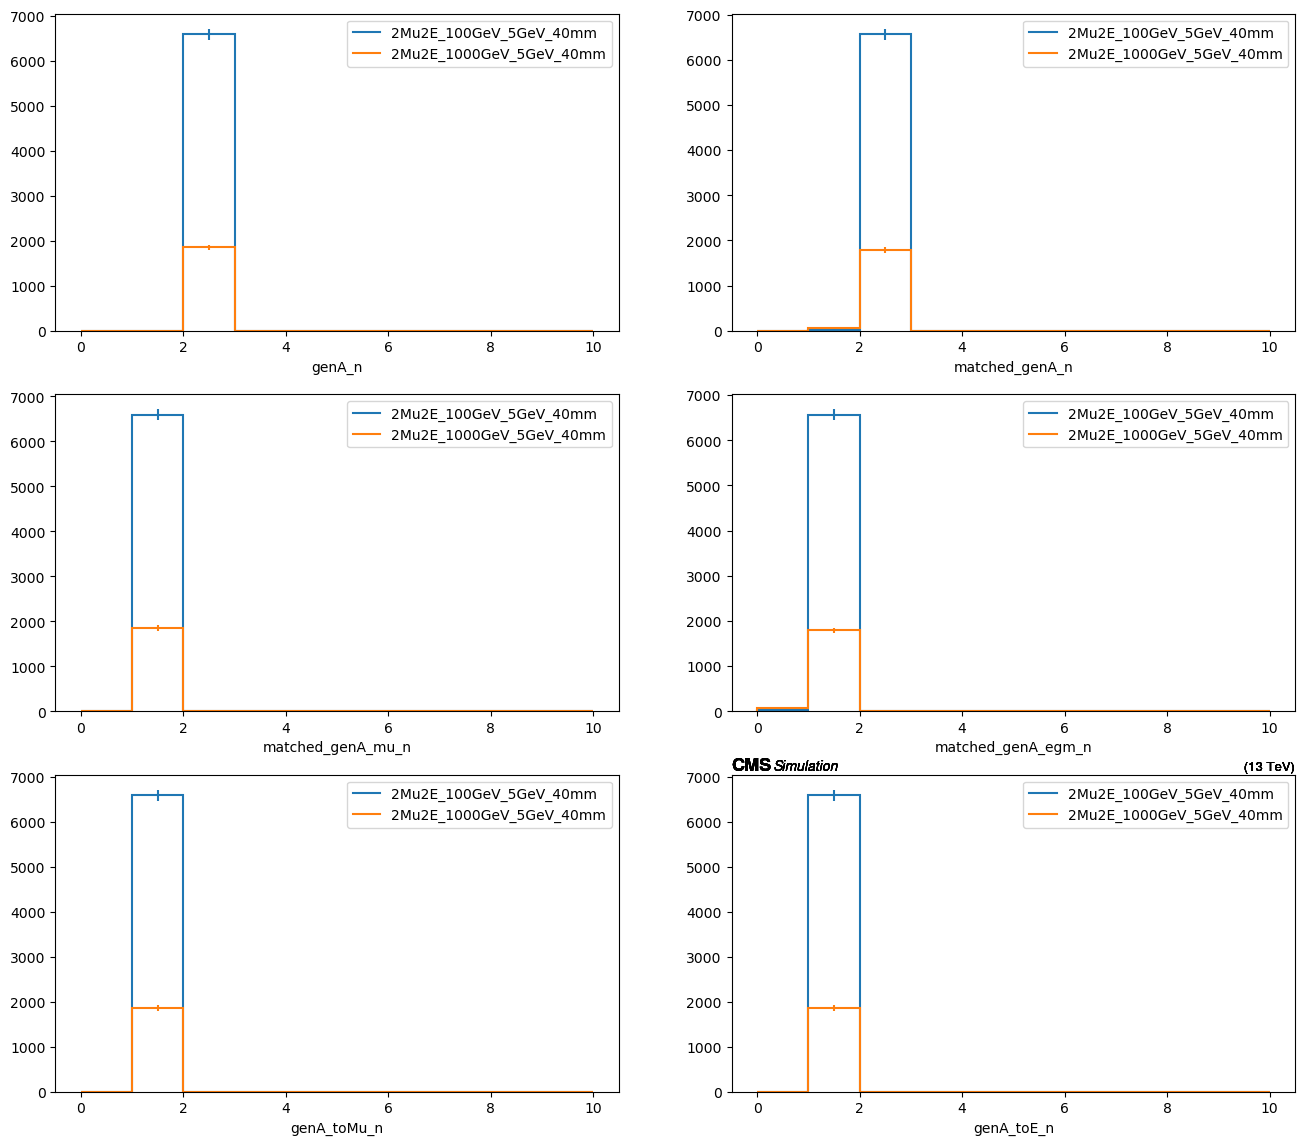

In [6]:
fig, ((ax1,ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(16,14))

utilities.plot([output["out"][f"{name}"]["hists"]["genA_n"][ch2,:] for name in samples], ax=ax1, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_n"][ch2,:] for name in samples], ax=ax2, density=False)


utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_mu_n"][ch2,:] for name in samples], ax=ax3, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_egm_n"][ch2,:] for name in samples], ax=ax4, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_n"][ch2,:] for name in samples], ax=ax5, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_toE_n"][ch2,:] for name in samples], ax=ax6, density=False)



ax1.legend(samples)
ax2.legend(samples)
ax3.legend(samples)
ax4.legend(samples)
ax5.legend(samples)
ax6.legend(samples)
#ax3.set_yscale('log')
#ax4.set_yscale('log')

1) In every event there are 2 dark photons. 
2) Not all dark photons have a lepton jet nearby ( under .4 $\Delta$R)
3) genA_toMu_n and genA_toE_n looks the same to me. Does that mean , each event has both muon jet and electron jet?
4) Matched genA_mu_n and Matched_genA_egm_n looks similar except for the latter has few events with zero lepton jets.




KeyError: 'genA_toMu_lxy'

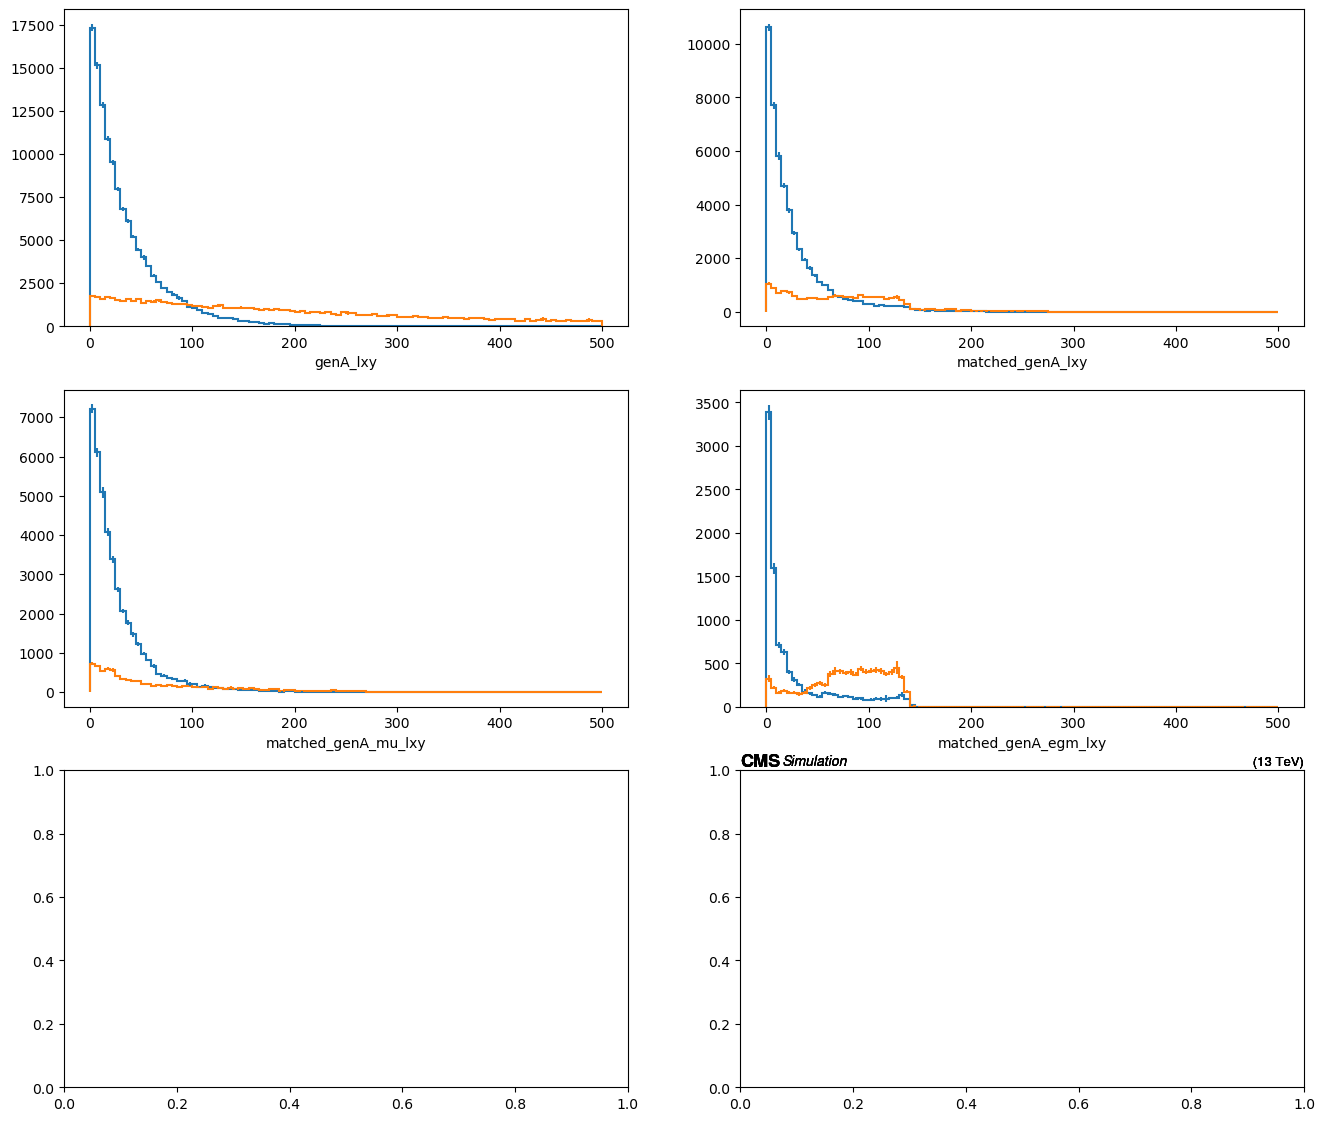

In [7]:
fig, ((ax1,ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(16,14))
ch1 ="no_lj_selection"
ch2="2mu2e"
utilities.plot([output["out"][f"{name}"]["hists"]["genA_lxy"][ch1,:] for name in samples], ax=ax1, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_lxy"][ch1,:] for name in samples], ax=ax2, density=False)


utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_mu_lxy"][ch1,:] for name in samples], ax=ax3, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_egm_lxy"][ch1,:] for name in samples], ax=ax4, density=False)

utilities.plot([output["out"][f"{name}"]["hists"]["genA_toMu_lxy"][ch1,:] for name in samples], ax=ax3, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_egm_lxy"][ch1,:] for name in samples], ax=ax4, density=False)



ax1.legend(samples)
ax2.legend(samples)
ax3.legend(samples)
ax4.legend(samples)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')

Here we see from the top two plots that not all dark photons have leptons jet nearby. From the botton graph we see that as the decay length of the sample increases, number of dark photons reconstructed decreases.

In [ ]:
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["matched_genA_lxy"][ch1,:50j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genA_lxy"][ch1,:50j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

In [ ]:
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["matched_genA_lxy"][ch1,:].plot_ratio(
       output["out"][ "2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_lxy"][ch1,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

In [ ]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(16,7))
ch1 ="no_lj_selection"
ch2="2mu2e"
utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_n"][ch2,:] for name in samples], ax=ax1, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_n"][ch2,:] for name in samples], ax=ax2, density=False)

utilities.plot([output["out"][f"{name}"]["hists"]["matched_genA_lxy"][ch2,:] for name in samples], ax=ax3, density=False)
utilities.plot([output["out"][f"{name}"]["hists"]["genA_lxy"][ch2,:] for name in samples], ax=ax4, density=False)
ax1.legend(samples)
ax2.legend(samples)
ax3.legend(samples)
ax4.legend(samples)
ax3.set_yscale('log')
ax4.set_yscale('log')

This is the same plot above for the 2mu2e selection, both lxy and n plots look the same for matched genA and GenA. That is because of the fact tha

In [ ]:
output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["matched_genA_lxy"][ch2,:50j].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_0p4mm"]["hists"]["genA_lxy"][ch2,:50j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

In [ ]:

output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["matched_genA_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_lxy"][ch2,:], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")